In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [2]:
df_ori = pd.read_csv('BBB_planB_weekly.csv')
df = df_ori.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T1_Act1,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T2_Act1,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T3_Act1,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T4_Act1,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T5_Act1,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T6_Act1,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T7_Act1,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T8_Act1,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T9_Act1,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T10_Act1,T10_Act2,T10_Act3,T10_Act4,T10_Act5,T10_Act6,T10_Act7,T10_Act9,T10_Act12,T10_Act13,T10_Act14,T10_Act19,T11_Act1,T11_Act2,T11_Act3,T11_Act4,T11_Act5,T11_Act6,T11_Act7,T11_Act9,T11_Act12,T11_Act13,T11_Act14,T11_Act19,T12_Act1,T12_Act2,T12_Act3,T12_Act4,T12_Act5,T12_Act6,T12_Act7,T12_Act9,T12_Act12,T12_Act13,T12_Act14,T12_Act19,T13_Act1,T13_Act2,T13_Act3,T13_Act4,T13_Act5,T13_Act6,T13_Act7,T13_Act9,T13_Act12,T13_Act13,T13_Act14,T13_Act19,T14_Act1,T14_Act2,T14_Act3,T14_Act4,T14_Act5,T14_Act6,T14_Act7,T14_Act9,T14_Act12,T14_Act13,T14_Act14,T14_Act19,T15_Act1,T15_Act2,T15_Act3,T15_Act4,T15_Act5,T15_Act6,T15_Act7,T15_Act9,T15_Act12,T15_Act13,T15_Act14,T15_Act19,T16_Act1,T16_Act2,T16_Act3,T16_Act4,T16_Act5,T16_Act6,T16_Act7,T16_Act9,T16_Act12,T16_Act13,T16_Act14,T16_Act19,T17_Act1,T17_Act2,T17_Act3,T17_Act4,T17_Act5,T17_Act6,T17_Act7,T17_Act9,T17_Act12,T17_Act13,T17_Act14,T17_Act19,T18_Act1,T18_Act2,T18_Act3,T18_Act4,T18_Act5,T18_Act6,T18_Act7,T18_Act9,T18_Act12,T18_Act13,T18_Act14,T18_Act19,T19_Act1,T19_Act2,T19_Act3,T19_Act4,T19_Act5,T19_Act6,T19_Act7,T19_Act9,T19_Act12,T19_Act13,T19_Act14,T19_Act19,T20_Act1,T20_Act2,T20_Act3,T20_Act4,T20_Act5,T20_Act6,T20_Act7,T20_Act9,T20_Act12,T20_Act13,T20_Act14,T20_Act19,T21_Act1,T21_Act12,T21_Act13,T21_Act14,T21_Act19,T21_Act2,T21_Act3,T21_Act4,T21_Act5,T21_Act6,T21_Act7,T21_Act9,T22_Act1,T22_Act12,T22_Act13,T22_Act14,T22_Act19,T22_Act2,T22_Act3,T22_Act4,T22_Act5,T22_Act6,T22_Act7,T22_Act9,T23_Act1,T23_Act12,T23_Act13,T23_Act14,T23_Act19,T23_Act2,T23_Act3,T23_Act4,T23_Act5,T23_Act6,T23_Act7,T23_Act9,T24_Act1,T24_Act12,T24_Act13,T24_Act14,T24_Act19,T24_Act2,T24_Act3,T24_Act4,T24_Act5,T24_Act6,T24_Act7,T24_Act9,T25_Act1,T25_Act12,T25_Act13,T25_Act14,T25_Act19,T25_Act2,T25_Act3,T25_Act4,T25_Act5,T25_Act6,T25_Act7,T25_Act9,T26_Act1,T26_Act12,T26_Act13,T26_Act14,T26_Act19,T26_Act2,T26_Act3,T26_Act4,T26_Act5,T26_Act6,T26_Act7,T26_Act9,T27_Act1,T27_Act12,T27_Act13,T27_Act14,T27_Act19,T27_Act2,T27_Act3,T27_Act4,T27_Act5,T27_Act6,T27_Act7,T27_Act9,T28_Act1,T28_Act12,T28_Act13,T28_Act14,T28_Act19,T28_Act2,T28_Act3,T28_Act4,T28_Act5,T28_Act6,T28_Act7,T28_Act9,T29_Act1,T29_Act12,T29_Act13,T29_Act14,T29_Act19,T29_Act2,T29_Act3,T29_Act4,T29_Act5,T29_Act6,T29_Act7,T29_Act9,T30_Act1,T30_Act12,T30_Act13,T30_Act14,T30_Act19,T30_Act2,T30_Act3,T30_Act4,T30_Act5,T30_Act6,T30_Act7,T30_Act9,T31_Act1,T31_Act12,T31_Act13,T31_Act14,T31_Act19,T31_Act2,T31_Act3,T31_Act4,T31_Act5,T31_Act6,T31_Act7,T31_Act9,T32_Act1,T32_Act12,T32_Act13,T32_Act14,T32_Act19,T32_Act2,T32_Act3,T32_Act4,T32_Act5,T32_Act6,T32_Act7,T32_Act9,T33_Act1,T33_Act12,T33_Act13,T33_Act14,T33_Act19,T33_Act2,T33_Act3,T33_Act4,T33_Act5,T33_Act6,T33_Act7,T33_Act9,T34_Act1,T34_Act12,T34_Act13,T34_Act14,T34_Act19,T34_Act2,T34_Act3,T34_Act4,T34_Act5,T34_Act6,T34_Act7,T34_Act9,T35_Act1,T35_Act12,T35_Act13,T35_Act14,T35_Act19,T35_Act2,T35_Act3,T35_Act4,T35_Act5,T35_Act6,T35_Act7,T35_Act9,T36_Act1,T36_Act12,T36_Act13,T36_Act14,T36_Act19,T36_Act2,T36_Act3,T36_Act4,T36_Act5,T3

# prepare X and y

In [4]:
X = df.drop(['final_result','id'], axis=1)
X

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T1_Act1,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T2_Act1,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T3_Act1,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T4_Act1,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T5_Act1,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T6_Act1,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T7_Act1,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T8_Act1,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T9_Act1,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T10_Act1,T10_Act2,T10_Act3,T10_Act4,T10_Act5,T10_Act6,T10_Act7,T10_Act9,T10_Act12,T10_Act13,T10_Act14,T10_Act19,T11_Act1,T11_Act2,T11_Act3,T11_Act4,T11_Act5,T11_Act6,T11_Act7,T11_Act9,T11_Act12,T11_Act13,T11_Act14,T11_Act19,T12_Act1,T12_Act2,T12_Act3,T12_Act4,T12_Act5,T12_Act6,T12_Act7,T12_Act9,T12_Act12,T12_Act13,T12_Act14,T12_Act19,T13_Act1,T13_Act2,T13_Act3,T13_Act4,T13_Act5,T13_Act6,T13_Act7,T13_Act9,T13_Act12,T13_Act13,T13_Act14,T13_Act19,T14_Act1,T14_Act2,T14_Act3,T14_Act4,T14_Act5,T14_Act6,T14_Act7,T14_Act9,T14_Act12,T14_Act13,T14_Act14,T14_Act19,T15_Act1,T15_Act2,T15_Act3,T15_Act4,T15_Act5,T15_Act6,T15_Act7,T15_Act9,T15_Act12,T15_Act13,T15_Act14,T15_Act19,T16_Act1,T16_Act2,T16_Act3,T16_Act4,T16_Act5,T16_Act6,T16_Act7,T16_Act9,T16_Act12,T16_Act13,T16_Act14,T16_Act19,T17_Act1,T17_Act2,T17_Act3,T17_Act4,T17_Act5,T17_Act6,T17_Act7,T17_Act9,T17_Act12,T17_Act13,T17_Act14,T17_Act19,T18_Act1,T18_Act2,T18_Act3,T18_Act4,T18_Act5,T18_Act6,T18_Act7,T18_Act9,T18_Act12,T18_Act13,T18_Act14,T18_Act19,T19_Act1,T19_Act2,T19_Act3,T19_Act4,T19_Act5,T19_Act6,T19_Act7,T19_Act9,T19_Act12,T19_Act13,T19_Act14,T19_Act19,T20_Act1,T20_Act2,T20_Act3,T20_Act4,T20_Act5,T20_Act6,T20_Act7,T20_Act9,T20_Act12,T20_Act13,T20_Act14,T20_Act19,T21_Act1,T21_Act12,T21_Act13,T21_Act14,T21_Act19,T21_Act2,T21_Act3,T21_Act4,T21_Act5,T21_Act6,T21_Act7,T21_Act9,T22_Act1,T22_Act12,T22_Act13,T22_Act14,T22_Act19,T22_Act2,T22_Act3,T22_Act4,T22_Act5,T22_Act6,T22_Act7,T22_Act9,T23_Act1,T23_Act12,T23_Act13,T23_Act14,T23_Act19,T23_Act2,T23_Act3,T23_Act4,T23_Act5,T23_Act6,T23_Act7,T23_Act9,T24_Act1,T24_Act12,T24_Act13,T24_Act14,T24_Act19,T24_Act2,T24_Act3,T24_Act4,T24_Act5,T24_Act6,T24_Act7,T24_Act9,T25_Act1,T25_Act12,T25_Act13,T25_Act14,T25_Act19,T25_Act2,T25_Act3,T25_Act4,T25_Act5,T25_Act6,T25_Act7,T25_Act9,T26_Act1,T26_Act12,T26_Act13,T26_Act14,T26_Act19,T26_Act2,T26_Act3,T26_Act4,T26_Act5,T26_Act6,T26_Act7,T26_Act9,T27_Act1,T27_Act12,T27_Act13,T27_Act14,T27_Act19,T27_Act2,T27_Act3,T27_Act4,T27_Act5,T27_Act6,T27_Act7,T27_Act9,T28_Act1,T28_Act12,T28_Act13,T28_Act14,T28_Act19,T28_Act2,T28_Act3,T28_Act4,T28_Act5,T28_Act6,T28_Act7,T28_Act9,T29_Act1,T29_Act12,T29_Act13,T29_Act14,T29_Act19,T29_Act2,T29_Act3,T29_Act4,T29_Act5,T29_Act6,T29_Act7,T29_Act9,T30_Act1,T30_Act12,T30_Act13,T30_Act14,T30_Act19,T30_Act2,T30_Act3,T30_Act4,T30_Act5,T30_Act6,T30_Act7,T30_Act9,T31_Act1,T31_Act12,T31_Act13,T31_Act14,T31_Act19,T31_Act2,T31_Act3,T31_Act4,T31_Act5,T31_Act6,T31_Act7,T31_Act9,T32_Act1,T32_Act12,T32_Act13,T32_Act14,T32_Act19,T32_Act2,T32_Act3,T32_Act4,T32_Act5,T32_Act6,T32_Act7,T32_Act9,T33_Act1,T33_Act12,T33_Act13,T33_Act14,T33_Act19,T33_Act2,T33_Act3,T33_Act4,T33_Act5,T33_Act6,T33_Act7,T33_Act9,T34_Act1,T34_Act12,T34_Act13,T34_Act14,T34_Act19,T34_Act2,T34_Act3,T34_Act4,T34_Act5,T34_Act6,T34_Act7,T34_Act9,T35_Act1,T35_Act12,T35_Act13,T35_Act14,T35_Act19,T35_Act2,T35_Act3,T35_Act4,T35_Act5,T35_Act6,T35_Act7,T35_Act9,T36_Act1,T36_Act12,T36_Act13,T36_Act14,T36_Act19,T36_Act2,T36_Act3,T36_Act4,T36_Act5,T3

In [5]:
y = df['final_result']
y

0       0
1       1
2       0
3       1
4       1
       ..
5336    1
5337    1
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [6]:
# convert to numpy array
X = X.values
y = y.values

In [7]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 480)
(1603, 480)
(3738,)
(1603,)


In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

# build MLP model

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
X_train.shape[1:]

(480,)

### --------------------------------------------------- set up learning rate---------------------------------------------------

In [40]:
## 
epochs=300
lr = 0.00001 

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.3612 - accuracy: 0.8752 (epochs=500) (lr = 0.00001) 

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.3523 - accuracy: 0.8771 (epochs=300) (lr = 0.00001) 

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.3676 - accuracy: 0.8784 (epochs=200) (lr = 0.00001) -->best

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4206 - accuracy: 0.8634 (lr = 0.00001) (epochs=100)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4670 - accuracy: 0.8659 (lr = 0.0001) (epochs=100)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               48100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 40)                4040      
                                                                 
 dropout_13 (Dropout)        (None, 40)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 41        
                                                                 
Total params: 52,181
Trainable params: 52,181
Non-trainable params: 0
_________________________________________________________________


# fit MLP model

In [42]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/300
117/117 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4914 - val_loss: 0.6874 - val_accuracy: 0.5459
Epoch 2/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5778 - val_loss: 0.6746 - val_accuracy: 0.6700
Epoch 3/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6637 - val_loss: 0.6627 - val_accuracy: 0.6999
Epoch 4/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6926 - val_loss: 0.6512 - val_accuracy: 0.7018
Epoch 5/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.7020 - val_loss: 0.6398 - val_accuracy: 0.7018
Epoch 6/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.6998 - val_loss: 0.6285 - val_accuracy: 0.7018
Epoch 7/300
117/117 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7020 - val_loss: 0.6174 - val_accuracy: 0.7024

117/117 [==============================] - 0s 946us/step - loss: 0.4624 - accuracy: 0.7568 - val_loss: 0.4573 - val_accuracy: 0.7511
Epoch 58/300
117/117 [==============================] - 0s 955us/step - loss: 0.4632 - accuracy: 0.7689 - val_loss: 0.4559 - val_accuracy: 0.7604
Epoch 59/300
117/117 [==============================] - 0s 954us/step - loss: 0.4639 - accuracy: 0.7715 - val_loss: 0.4546 - val_accuracy: 0.7679
Epoch 60/300
117/117 [==============================] - 0s 946us/step - loss: 0.4605 - accuracy: 0.7817 - val_loss: 0.4533 - val_accuracy: 0.7717
Epoch 61/300
117/117 [==============================] - 0s 954us/step - loss: 0.4589 - accuracy: 0.7892 - val_loss: 0.4520 - val_accuracy: 0.7779
Epoch 62/300
117/117 [==============================] - 0s 946us/step - loss: 0.4583 - accuracy: 0.7897 - val_loss: 0.4507 - val_accuracy: 0.7810
Epoch 63/300
117/117 [==============================] - 0s 946us/step - loss: 0.4558 - accuracy: 0.8010 - val_loss: 0.4493 - val_accuracy

117/117 [==============================] - 0s 954us/step - loss: 0.3924 - accuracy: 0.8721 - val_loss: 0.3981 - val_accuracy: 0.8777
Epoch 114/300
117/117 [==============================] - 0s 946us/step - loss: 0.3892 - accuracy: 0.8713 - val_loss: 0.3976 - val_accuracy: 0.8777
Epoch 115/300
117/117 [==============================] - 0s 954us/step - loss: 0.3896 - accuracy: 0.8740 - val_loss: 0.3969 - val_accuracy: 0.8765
Epoch 116/300
117/117 [==============================] - 0s 946us/step - loss: 0.3905 - accuracy: 0.8756 - val_loss: 0.3961 - val_accuracy: 0.8759
Epoch 117/300
117/117 [==============================] - 0s 946us/step - loss: 0.3895 - accuracy: 0.8751 - val_loss: 0.3953 - val_accuracy: 0.8752
Epoch 118/300
117/117 [==============================] - 0s 946us/step - loss: 0.3842 - accuracy: 0.8780 - val_loss: 0.3948 - val_accuracy: 0.8752
Epoch 119/300
117/117 [==============================] - 0s 946us/step - loss: 0.3856 - accuracy: 0.8724 - val_loss: 0.3943 - val_ac

Epoch 169/300
117/117 [==============================] - 0s 946us/step - loss: 0.3524 - accuracy: 0.8759 - val_loss: 0.3721 - val_accuracy: 0.8796
Epoch 170/300
117/117 [==============================] - 0s 946us/step - loss: 0.3521 - accuracy: 0.8756 - val_loss: 0.3717 - val_accuracy: 0.8796
Epoch 171/300
117/117 [==============================] - 0s 954us/step - loss: 0.3495 - accuracy: 0.8772 - val_loss: 0.3716 - val_accuracy: 0.8796
Epoch 172/300
117/117 [==============================] - 0s 946us/step - loss: 0.3519 - accuracy: 0.8791 - val_loss: 0.3712 - val_accuracy: 0.8796
Epoch 173/300
117/117 [==============================] - 0s 946us/step - loss: 0.3475 - accuracy: 0.8756 - val_loss: 0.3710 - val_accuracy: 0.8790
Epoch 174/300
117/117 [==============================] - 0s 946us/step - loss: 0.3514 - accuracy: 0.8780 - val_loss: 0.3705 - val_accuracy: 0.8790
Epoch 175/300
117/117 [==============================] - 0s 946us/step - loss: 0.3499 - accuracy: 0.8812 - val_loss: 0

Epoch 225/300
117/117 [==============================] - 0s 946us/step - loss: 0.3248 - accuracy: 0.8799 - val_loss: 0.3593 - val_accuracy: 0.8771
Epoch 226/300
117/117 [==============================] - 0s 954us/step - loss: 0.3301 - accuracy: 0.8810 - val_loss: 0.3590 - val_accuracy: 0.8771
Epoch 227/300
117/117 [==============================] - 0s 946us/step - loss: 0.3241 - accuracy: 0.8818 - val_loss: 0.3588 - val_accuracy: 0.8765
Epoch 228/300
117/117 [==============================] - 0s 954us/step - loss: 0.3227 - accuracy: 0.8820 - val_loss: 0.3589 - val_accuracy: 0.8771
Epoch 229/300
117/117 [==============================] - 0s 954us/step - loss: 0.3189 - accuracy: 0.8871 - val_loss: 0.3589 - val_accuracy: 0.8771
Epoch 230/300
117/117 [==============================] - 0s 954us/step - loss: 0.3221 - accuracy: 0.8815 - val_loss: 0.3587 - val_accuracy: 0.8771
Epoch 231/300
117/117 [==============================] - 0s 963us/step - loss: 0.3238 - accuracy: 0.8815 - val_loss: 0

Epoch 281/300
117/117 [==============================] - 0s 963us/step - loss: 0.3087 - accuracy: 0.8884 - val_loss: 0.3531 - val_accuracy: 0.8765
Epoch 282/300
117/117 [==============================] - 0s 962us/step - loss: 0.3072 - accuracy: 0.8879 - val_loss: 0.3530 - val_accuracy: 0.8765
Epoch 283/300
117/117 [==============================] - 0s 963us/step - loss: 0.3047 - accuracy: 0.8876 - val_loss: 0.3530 - val_accuracy: 0.8765
Epoch 284/300
117/117 [==============================] - 0s 954us/step - loss: 0.3048 - accuracy: 0.8876 - val_loss: 0.3530 - val_accuracy: 0.8765
Epoch 285/300
117/117 [==============================] - 0s 954us/step - loss: 0.3047 - accuracy: 0.8922 - val_loss: 0.3527 - val_accuracy: 0.8765
Epoch 286/300
117/117 [==============================] - 0s 954us/step - loss: 0.3059 - accuracy: 0.8884 - val_loss: 0.3526 - val_accuracy: 0.8765
Epoch 287/300
117/117 [==============================] - 0s 954us/step - loss: 0.3028 - accuracy: 0.8917 - val_loss: 0

In [43]:
history_model.params

{'verbose': 1, 'epochs': 300, 'steps': 117}

In [44]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 439us/step - loss: 0.3523 - accuracy: 0.8771


[0.3523361086845398, 0.8771054148674011]

# plot MLP learning process

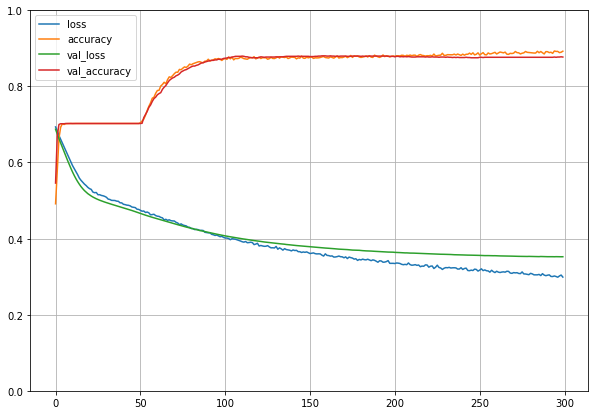

In [45]:
pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

another way to plot

def validation_training_process(history):
  plt.plot(history.history['loss'], label='Training Loss', color='green', linestyle = '--')
  plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', linestyle ='--')
  plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
  plt.title('Training Process Visualization')

  plt.xlabel('No. epoch')
  plt.legend()
  plt.show()

validation_training_process(history_model)